### Experiment analysis

In [1]:
import pandas as pd
import numpy as np
from ast import literal_eval

In [2]:
exp_data = pd.read_csv("experiment_data.csv")
print(exp_data.shape)
# exp_data.head()

(7010, 12)


In [3]:
print(f"Duración: {sum(exp_data['resolution_time'])} segundos")
print(f"Duración: {sum(exp_data['resolution_time'])/60} minutos")
print(f"Duración: {sum(exp_data['resolution_time'])/3600} horas")
print(f"Duración: {sum(exp_data['resolution_time'])/(3600*24)} días")

Duración: 2398649.877249956 segundos
Duración: 39977.497954165934 minutos
Duración: 666.2916325694323 horas
Duración: 27.76215135705968 días


In [16]:
# exp_data[(exp_data["class_size"]==40) & (exp_data["resolution_time"]>6000)]

In [4]:
print(pd.value_counts(exp_data["result_type"]))

optimal    7010
Name: result_type, dtype: int64


In [5]:
groups = ["class_size","instance","solver","group_size","score_type"]
grouped = exp_data.groupby(by=groups)
gg2 = grouped.agg({"formed_teams":pd.Series.nunique, "score":np.mean})
gg2.rename(columns={"formed_teams":"different_teams","score":"avg_repscore"},inplace=True)
exp_data = pd.merge(exp_data,gg2,on=groups)
exp_data["verify_best_sol"] = exp_data["score"] - exp_data["avg_repscore"]
gg2

different_teams  \
class_size instance solver group_size score_type                    
20         1        CBC    3-5        belbin                    1   
                                      mbti                      1   
                           4          belbin                    1   
                                      mbti                      1   
                           5          belbin                    1   
...                                                           ...   
60         30       SAT    4          mbti                      1   
                    SCIP   3          belbin                    1   
                                      mbti                      1   
                           4          belbin                    1   
                                      mbti                      1   

                                                  avg_repscore  
class_size instance solver group_size score_type                
20         1        CBC    3-5        belbin             4.125  
                                      mbti               2.750  
                           4          belbin             3.875  
                                      mbti               2.750  
                           5          belbin             3.500  
...                                                        ...  
60         30       SAT    4          mbti               8.500  
                    SCIP   3          belbin            16.000  
                                      mbti               7.875  
                           4          belbin            13.250  
                                      mbti               8.500  

[1759 rows x 2 columns]

In [6]:
exp_data["formed_teams"] = exp_data["formed_teams"].map(literal_eval)
exp_data["team_scores"] = exp_data["team_scores"].map(literal_eval)
def convert_dicts(list):
    d = {}
    for team in list:
        size = len(team)
        name = f"teams_{size}_members"
        if name not in d:
            d[name] = 1
        else:
            d[name] += 1
    return d
exp_data["team_sizes"] = exp_data["formed_teams"].map(convert_dicts)
exp_data["avg_tscore"] = exp_data["team_scores"].map(np.mean)
#https://stackoverflow.com/questions/38231591/split-explode-a-column-of-dictionaries-into-separate-columns-with-pandas
teams_members = pd.json_normalize(exp_data["team_sizes"])
exp_data = pd.concat([exp_data,teams_members],axis=1)
exp_data.drop(columns=["team_sizes"],inplace=True)

In [7]:
exp_data.head()

,class_size,instance,rep,solver,resolution_time,result_type,formed_teams,team_scores,score,score_type,name,group_size,different_teams,avg_repscore,verify_best_sol,avg_tscore,teams_3_members,teams_5_members,teams_4_members
0,20,1,1,SCIP,23.205593,optimal,"[{328, 336, 77}, {363, 100, 239}, {281, 219, 2...","[0.375, 0.625, 0.75, 0.75, 0.625, 1.0]",4.125,belbin,belbin-Student_num-20-instance-1-rep1-SCIP,3-5,1,4.125,0.0,0.6875,5.0,1.0,NaN
1,20,1,2,SCIP,22.118415,optimal,"[{328, 336, 77}, {363, 100, 239}, {281, 219, 2...","[0.375, 0.625, 0.75, 0.75, 0.625, 1.0]",4.125,belbin,belbin-Student_num-20-instance-1-rep2-SCIP,3-5,1,4.125,0.0,0.6875,5.0,1.0,NaN
2,20,1,3,SCIP,21.907599,optimal,"[{328, 336, 77}, {363, 100, 239}, {281, 219, 2...","[0.375, 0.625, 0.75, 0.75, 0.625, 1.0]",4.125,belbin,belbin-Student_num-20-instance-1-rep3-SCIP,3-5,1,4.125,0.0,0.6875,5.0,1.0,NaN
3,20,1,4,SCIP,21.937704,optimal,"[{328, 336, 77}, {363, 100, 239}, {281, 219, 2...","[0.375, 0.625, 0.75, 0.75, 0.625, 1.0]",4.125,belbin,belbin-Student_num-20-instance-1-rep4-SCIP,3-5,1,4.125,0.0,0.6875,5.0,1.0,NaN
4,20,1,5,SCIP,22.104961,optimal,"[{328, 336, 77}, {363, 100, 239}, {281, 219, 2...","[0.375, 0.625, 0.75, 0.75, 0.625, 1.0]",4.125,belbin,belbin-Student_num-20-instance-1-rep5-SCIP,3-5,1,4.125,0.0,0.6875,5.0,1.0,NaN


In [8]:
#number of optimal solutions that differ
exp_data[exp_data["verify_best_sol"] > 10e-6].shape[0]

0

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

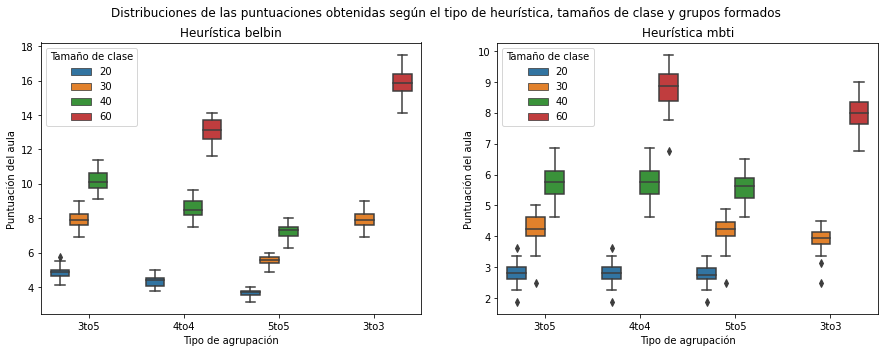

In [13]:
plt.figure(figsize=(15,5))
plt.suptitle("Distribuciones de las puntuaciones obtenidas según el tipo de heurística, tamaños de clase y grupos formados")
i=1
for score in pd.unique(exp_data["score_type"]):
    plt.subplot(1,2,i)
    s = exp_data[(exp_data["solver"]=="SCIP")&(exp_data["rep"]==1)&(exp_data["score_type"]==score)].copy()
    s["group_size"] = s["group_size"].replace({"3-5":"3to5","4":"4to4","5":"5to5","3":"3to3"})
    sns.boxplot(x="group_size",y="score",hue="class_size",data=s)
    plt.xlabel("Tipo de agrupación")
    plt.ylabel("Puntuación del aula")
    plt.legend(title="Tamaño de clase")
    plt.title(f"Heurística {score}")
    i+=1
plt.show()

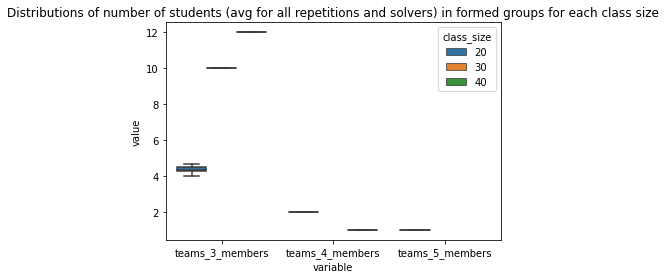

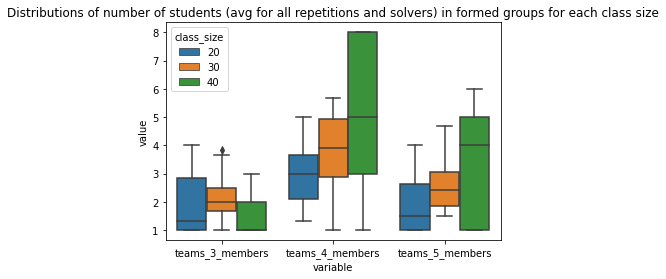

In [15]:
c = ["class_size","instance","rep","solver","group_size","score_type","teams_3_members","teams_4_members","teams_5_members"]
groups2 = ["class_size","instance","score_type"]
s = exp_data[c]
s = s.loc[s["group_size"]=="3-5"]
s = pd.melt(s,id_vars=groups+["rep"])
s = s.groupby(groups2+["variable"]).mean()
s = s.reset_index()
# for i in range(20,41,10):
    # sns.boxplot(x="variable",y="value",data=s[s["class_size"]==i])
    # plt.title(f"Distributions of number of students (avg for all repetitions and solvers) in formed groups class size={i}")
    # plt.show()
for score in pd.unique(s["score_type"]):
    sns.boxplot(x="variable",y="value",hue="class_size",data=s[s["score_type"]==score])
    plt.title("Distributions of number of students (avg for all repetitions and solvers) in formed groups for each class size")
    plt.show()

<AxesSubplot:xlabel='variable', ylabel='value'>

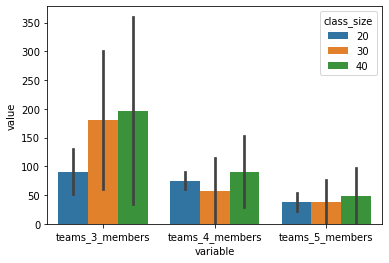

In [16]:
s2 = s.groupby(["class_size","score_type","variable"]).sum()
s2 = s2.reset_index()
sns.barplot(data=s2,x="variable",y="value",hue="class_size")

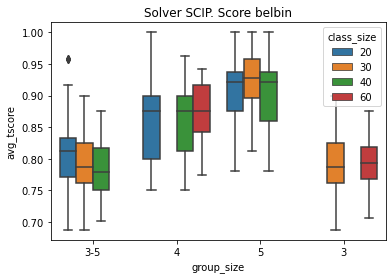

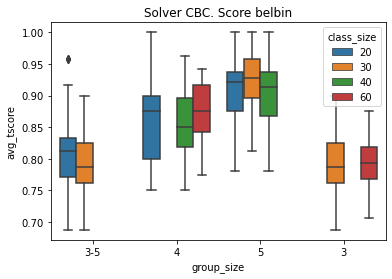

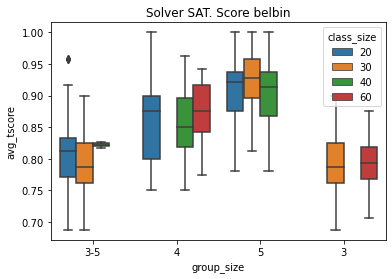

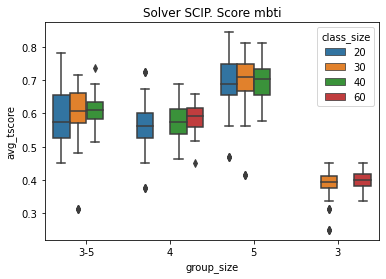

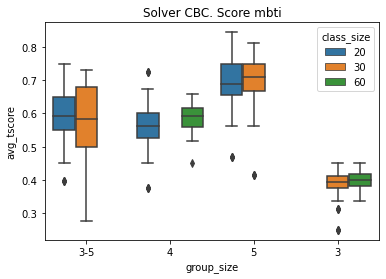

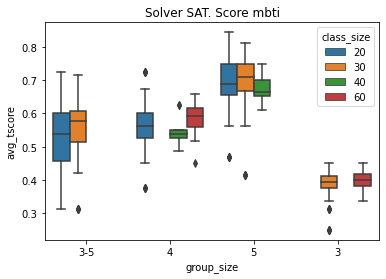

In [17]:
for score in pd.unique(exp_data["score_type"]):
    for solver in pd.unique(exp_data["solver"]):
        d = exp_data[(exp_data["solver"]==solver)&(exp_data["score_type"]==score)]
        sns.boxplot(x="group_size",y="avg_tscore",hue="class_size",data=d)
        plt.title(f"Solver {solver}. Score {score}")
        plt.show()

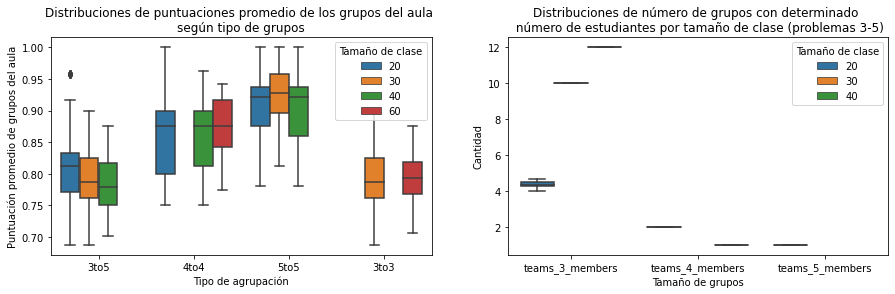

In [19]:
plt.figure(figsize=(15,4))
# plt.suptitle("Heurística de Belbin")
plt.subplot(121)
d = exp_data[(exp_data["score_type"]=="belbin")].copy()
d["group_size"] = d["group_size"].replace({"3-5":"3to5","4":"4to4","5":"5to5","3":"3to3"})
sns.boxplot(x="group_size",y="avg_tscore",hue="class_size",data=d)
plt.xlabel("Tipo de agrupación")
plt.ylabel("Puntuación promedio de grupos del aula")
plt.legend(title="Tamaño de clase")
plt.title(f"Distribuciones de puntuaciones promedio de los grupos del aula \nsegún tipo de grupos")

plt.subplot(122)
sns.boxplot(x="variable",y="value",hue="class_size",data=s[s["score_type"]=="belbin"])
plt.title("Distribuciones de número de grupos con determinado \n número de estudiantes por tamaño de clase (problemas 3-5)")
plt.xlabel("Tamaño de grupos")
plt.legend(title="Tamaño de clase")
plt.ylabel("Cantidad")
plt.show()

In [14]:
# sns.catplot(x="group_size",y="resolution_time",hue="solver",row="class_size",data=exp_data,kind="box",sharey = False,height=10)

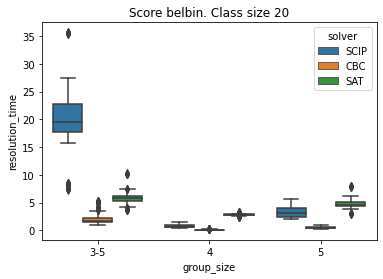

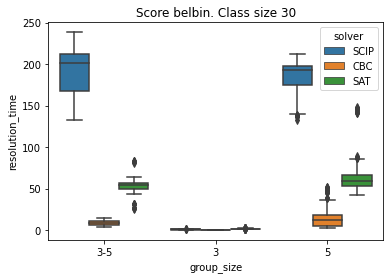

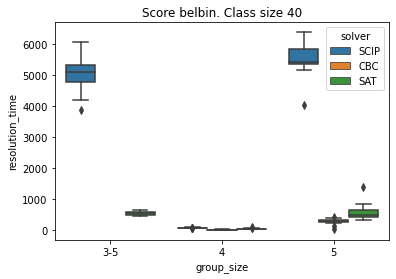

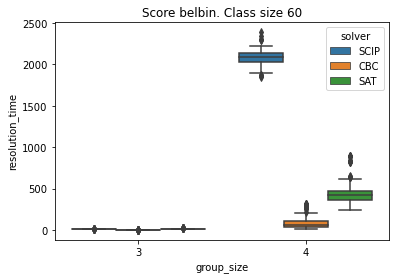

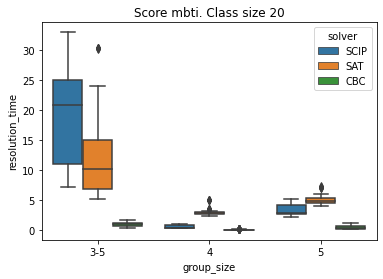

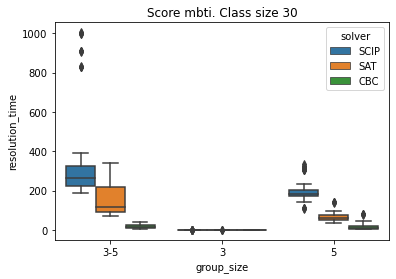

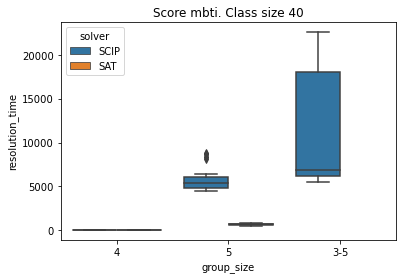

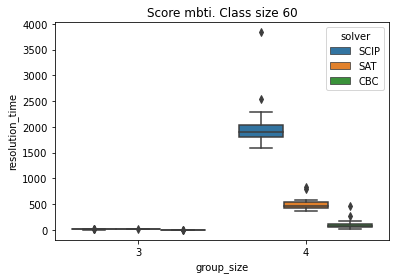

In [15]:
for score in pd.unique(exp_data["score_type"]):
    for class_size in pd.unique(exp_data["class_size"]):
        d = exp_data[(exp_data["class_size"]==class_size)&(exp_data["score_type"]==score)]
        sns.boxplot(x="group_size",y="resolution_time",hue="solver",data=d)
        plt.title(f"Score {score}. Class size {class_size}")
        plt.show()

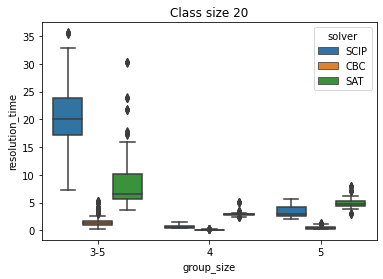

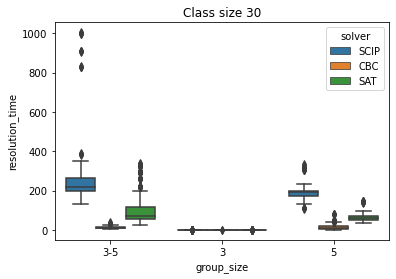

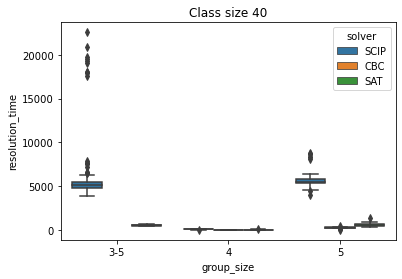

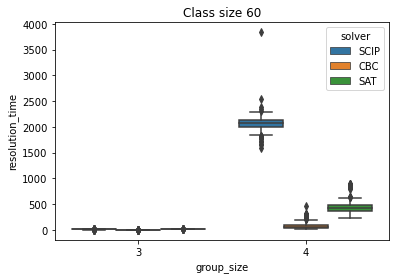

In [16]:
# c = 0
for class_size in pd.unique(exp_data["class_size"]):
# for i in range(20,61,10):
    # c+=1
    # plt.subplot(2,2,c)
    d = exp_data[exp_data["class_size"]==class_size]
    plt.title(f"Class size {class_size}")
    sns.boxplot(x="group_size",y="resolution_time",hue="solver",data=d)
    plt.show()

In [17]:
dobs = exp_data.loc[exp_data["different_teams"]>1]
dobs["solver"].describe()

count     420
unique      1
top       CBC
freq      420
Name: solver, dtype: object

#### 2. Análisis estadístico

In [18]:
import pingouin as pg
from statsmodels.graphics.factorplots import interaction_plot

#### Asunciones
https://www.statology.org/repeated-measures-anova-assumptions/   
https://pulmonarychronicles.com/index.php/pulmonarychronicles/article/download/163/411?inline=1#:~:text=It%20is%20the%20non%2Dparametric%20equivalent%20of%20the%20repeat%20measures,data%20for%20making%20statistical%20inferences. (test de friedman es la alternativa no paramétrica)

### Guías y funcionamiento
http://halweb.uc3m.es/esp/Personal/personas/jmmarin/esp/GuiaSPSS/16anovar.pdf  
https://statistics.laerd.com/statistical-guides/repeated-measures-anova-statistical-guide-3.php

#### Post hoc
https://stats.stackexchange.com/questions/457479/post-hoc-test-for-one-way-repeated-measures-anova (anovas de medidas repetidas pareadas)
https://www.ibm.com/docs/es/spss-statistics/beta?topic=statistics-repeated-measures-anova (cosas del ibm con test de bonferroni y cosas no muy guays)

In [20]:
exp_data_red = exp_data[["class_size","instance","solver","score_type","group_size","resolution_time"]].copy(deep=True)
mid_data = exp_data_red.groupby(by=["class_size","instance","solver","score_type","group_size"]).mean()
mid_data.reset_index(inplace=True)

In [21]:
from scipy import stats
def distribuciones(class_size,score_type,group_size):
    filtered = mid_data[(mid_data["class_size"]==class_size) & (mid_data["score_type"]==score_type) &
                        (mid_data["group_size"]==group_size)]
    sns.boxplot(x="resolution_time",y="solver",data=filtered)
    plt.xlabel("Tiempo de ejecución promedio")
    plt.ylabel("Solver")
    plt.title("Distribución de tiempos de ejecución promedios por solver")
    plt.show()

def tests(class_size,score_type,group_size):
    filtered = mid_data[(mid_data["class_size"]==class_size) & (mid_data["score_type"]==score_type) &
                        (mid_data["group_size"]==group_size)]
    solvers = pd.unique(filtered["solver"])
    i = 0
    plt.figure(figsize=(20,4))
    for solver in solvers:
        i+=1
        data = filtered[filtered["solver"]==solver]
        times = data["resolution_time"]
        plt.subplot(1,3,i)
        stats.probplot(x=times,plot=plt)
        plt.title(f"Solver {solver}. SP-Wilk p-value = {round(stats.shapiro(times)[1],3)}")
    plt.show()
    rm_aov = pg.rm_anova(data = filtered, dv = "resolution_time", within = "solver", subject = "instance", detailed = True, correction = "auto")
    # print(f"Normality p-value: {pg.normality(data = filtered, dv = 'resolution_time', group = 'solver')}")
    try:
        print(f"Sphericity: {rm_aov['sphericity'][0]}")
    except:
        print(pg.sphericity(data = filtered, dv = "resolution_time", within = "solver", subject = "instance"))
    friedman = pg.friedman(data = filtered, dv = "resolution_time", within = "solver", subject = "instance")
    return rm_aov,friedman

def post_hoc(class_size,score_type,group_size,param="False",alternative="two-sided"): #two-sided, greater, less
    filtered = mid_data[(mid_data["class_size"]==class_size) & (mid_data["score_type"]==score_type) &
                        (mid_data["group_size"]==group_size)]
    return pg.pairwise_ttests(data = filtered, dv = 'resolution_time', within = 'solver', subject = 'instance', parametric=param,alternative=alternative)
    # https://pingouin-stats.org/generated/pingouin.pairwise_ttests.html#pingouin.pairwise_ttests

In [22]:
mid_data

,class_size,instance,solver,score_type,group_size,resolution_time
0,20,1,CBC,belbin,3-5,3.082726
1,20,1,CBC,belbin,4,0.069938
2,20,1,CBC,belbin,5,0.854371
3,20,1,CBC,mbti,3-5,0.757951
4,20,1,CBC,mbti,4,0.113196
...,...,...,...,...,...,...
1754,60,30,SAT,mbti,4,432.022170
1755,60,30,SCIP,belbin,3,11.574736
1756,60,30,SCIP,belbin,4,2046.885445
1757,60,30,SCIP,mbti,3,7.827883


In [57]:
mid_data2 = mid_data[(mid_data["class_size"]==60)&(mid_data["score_type"]=="mbti")&
(mid_data["group_size"]=="4")]
mid_data2.groupby(["solver"]).mean()

,class_size,instance,resolution_time
solver,,,
CBC,60.0,15.5,103.220296
SAT,60.0,15.5,491.348289
SCIP,60.0,15.5,1987.569344


In [30]:
# mid_data.shape
# exp_data.shape

In [35]:
exp_data2 = exp_data[(exp_data["class_size"]==30)&(exp_data["score_type"]=="belbin")&
(exp_data["group_size"]=="5")]
exp_data2.groupby(["solver"]).mean()

,class_size,instance,rep,resolution_time,score,different_teams,avg_repscore,verify_best_sol,avg_tscore,teams_3_members,teams_5_members,teams_4_members
solver,,,,,,,,,,,,
CBC,20.0,15.5,3.0,0.496411,3.608333,1.066667,3.608333,0.0,0.902083,NaN,4.0,NaN
SAT,20.0,15.5,3.0,4.841770,3.608333,1.000000,3.608333,0.0,0.902083,NaN,4.0,NaN
SCIP,20.0,15.5,3.0,3.346426,3.608333,1.000000,3.608333,0.0,0.902083,NaN,4.0,NaN


In [22]:
filtered = mid_data[(mid_data["class_size"]==30)]
rm_aov = pg.rm_anova(data = filtered, dv = "resolution_time", within = ["score_type","solver"], subject = "instance", detailed = True, correction = "auto")
rm_aov

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,score_type,38072.285238,1,29,38072.285238,42.576689,3.813146e-07,3.813146e-07,0.594840,1.000000
1,solver,613580.859547,2,58,306790.429774,252.053308,2.481245e-29,2.668155e-18,0.896817,0.590980
2,score_type * solver,16238.098242,2,58,8119.049121,7.182224,1.633727e-03,7.995775e-03,0.198501,0.601338


In [23]:
# pg.pairwise_ttests(data = filtered, dv = 'resolution_time', within = ["score_type","solver"], subject = 'instance', parametric=False)

2. BELBIN

##### 2.1. 3-5

In [24]:
belbin35 = mid_data[(mid_data["score_type"]=="belbin")&
                    (mid_data["group_size"]=="3-5")]
pd.value_counts(belbin35["class_size"])

20    90
30    90
40    32
Name: class_size, dtype: int64

2.1.1. Clases de 20

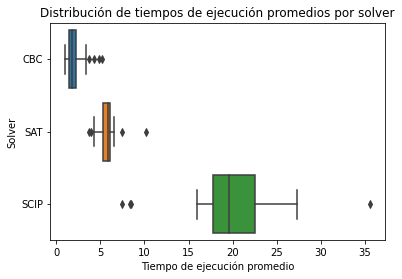

In [25]:
distribuciones(class_size=20,score_type="belbin",group_size="3-5")

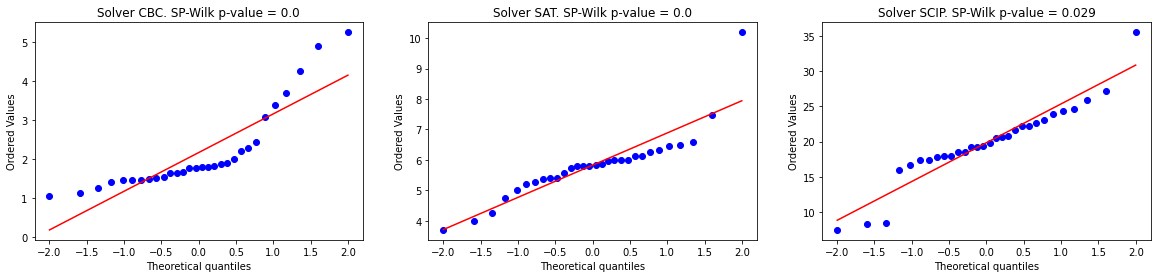

Sphericity: False


In [26]:
rm_anova, friedman = tests(class_size=20,score_type="belbin",group_size="3-5")

In [27]:
friedman

,Source,W,ddof1,Q,p-unc
Friedman,solver,0.967778,2,58.066667,2.460274e-13


In [28]:
post_hoc(class_size=20,score_type="belbin",group_size="3-5")
post_hoc(class_size=20,score_type="belbin",group_size="3-5",alternative="less")

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,solver,CBC,SAT,True,False,-11.968935,29.0,less,4.824683e-13,1.648e+10,-3.247163
1,solver,CBC,SCIP,True,False,-16.388908,29.0,less,1.674568e-16,3.343e+13,-4.341065
2,solver,SAT,SCIP,True,False,-13.849745,29.0,less,1.290596e-14,5.223e+11,-3.436851


2.1.2. Clases de 30

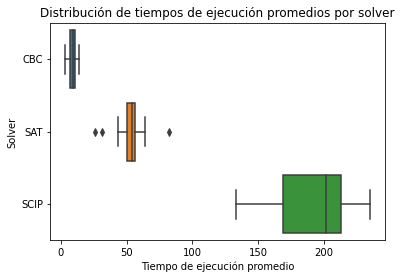

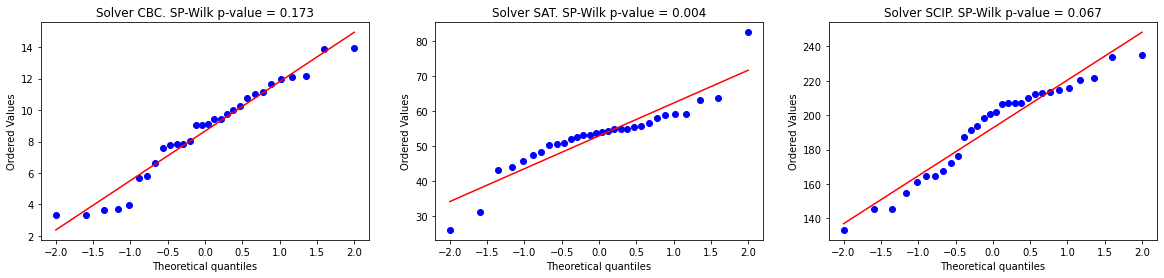

Sphericity: False
Friedman    9.357623e-14
Name: p-unc, dtype: float64
3.939321266440432e-28


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,solver,CBC,SAT,True,False,-24.256304,29.0,less,4.145778e-21,8.89e+17,-6.026983
1,solver,CBC,SCIP,True,False,-35.376032,29.0,less,1.043673e-25,2.392e+22,-9.248669
2,solver,SAT,SCIP,True,False,-27.671561,29.0,less,1.059776e-22,3.032e+19,-6.663540


In [29]:
distribuciones(class_size=30,score_type="belbin",group_size="3-5")
rm_anova, friedman = tests(class_size=30,score_type="belbin",group_size="3-5")
print(friedman["p-unc"])
print(rm_anova["p-GG-corr"].iloc[0])
post_hoc(class_size=30,score_type="belbin",group_size="3-5",alternative="less")

#### 2.2. Grupos de 4

##### 2.2.1. Clases de 20

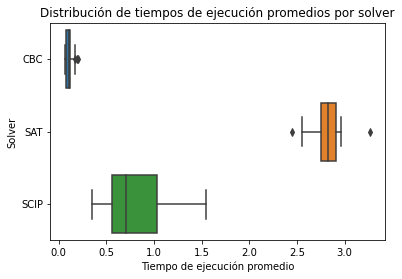

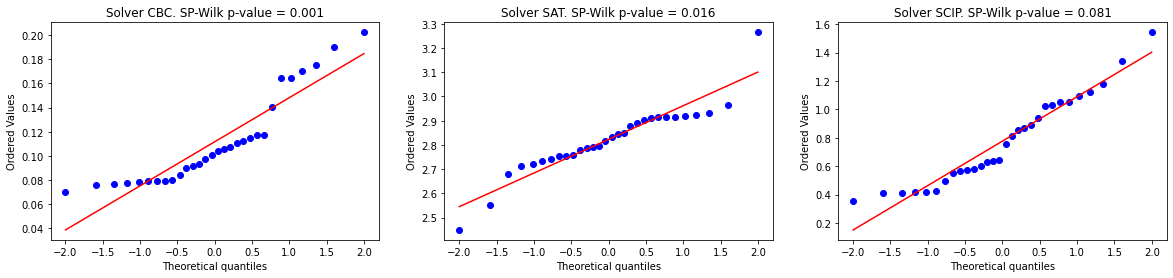

Sphericity: False
Friedman    9.357623e-14
Name: p-unc, dtype: float64


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,solver,CBC,SAT,True,False,-99.194240,29.0,less,1.427896e-38,6.172e+34,-25.722141
1,solver,CBC,SCIP,True,False,-11.597039,29.0,less,1.033934e-12,7.973e+09,-2.975235
2,solver,SAT,SCIP,True,False,30.730922,29.0,less,1.000000e+00,1.935e-21,8.379304


In [30]:
distribuciones(class_size=20,score_type="belbin",group_size="4")
rm_anova, friedman = tests(class_size=20,score_type="belbin",group_size="4")
print(friedman["p-unc"])
post_hoc(class_size=20,score_type="belbin",group_size="4",alternative="less")

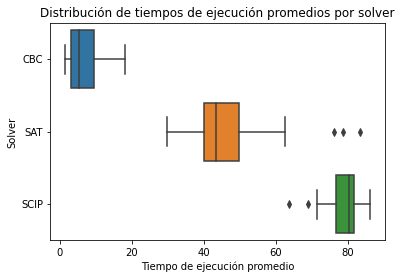

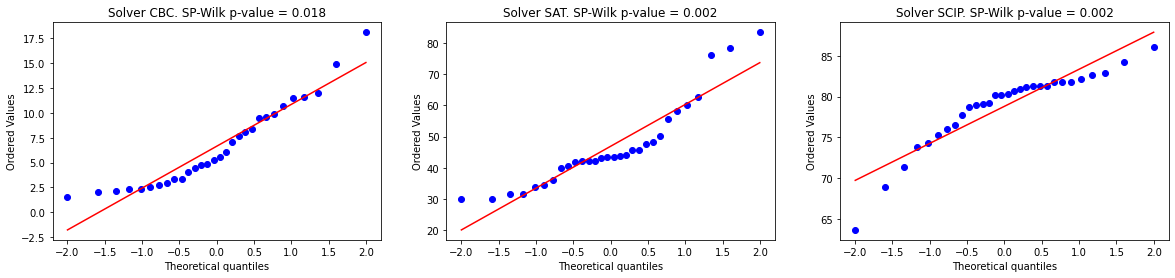

Sphericity: False
Friedman    2.460274e-13
Name: p-unc, dtype: float64


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,solver,CBC,SAT,True,False,-15.203221,29.0,less,1.186342e-15,5.123e+12,-3.882876
1,solver,CBC,SCIP,True,False,-59.134371,29.0,less,4.335588e-32,3.419e+28,-15.886902
2,solver,SAT,SCIP,True,False,-11.688632,29.0,less,8.556913e-13,9.547e+09,-3.048432


In [31]:
distribuciones(class_size=40,score_type="belbin",group_size="4")
rm_anova, friedman = tests(class_size=40,score_type="belbin",group_size="4")
print(friedman["p-unc"])
post_hoc(class_size=40,score_type="belbin",group_size="4",alternative="less")

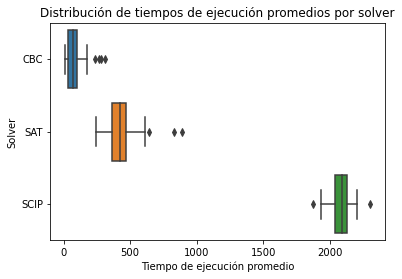

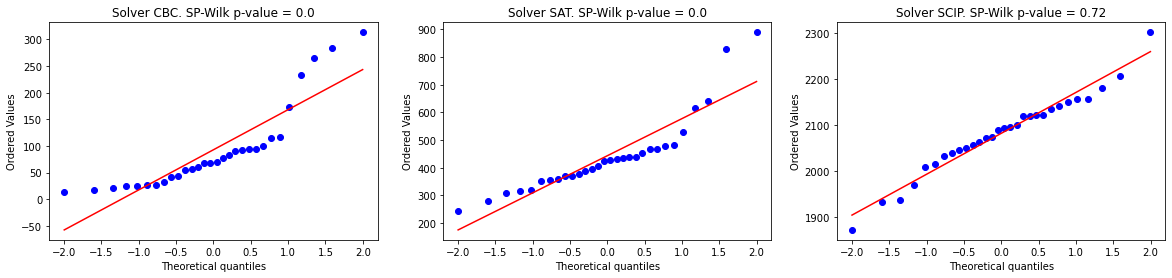

Sphericity: False
Friedman    2.460274e-13
Name: p-unc, dtype: float64


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,solver,CBC,SAT,True,False,-11.192875,29.0,less,2.411326e-12,3.561e+09,-2.980355
1,solver,CBC,SCIP,True,False,-104.867782,29.0,less,2.858046e-39,2.916e+35,-23.349789
2,solver,SAT,SCIP,True,False,-54.521315,29.0,less,4.478676e-31,3.592e+27,-13.701877


In [32]:
distribuciones(class_size=60,score_type="belbin",group_size="4")
rm_anova, friedman = tests(class_size=60,score_type="belbin",group_size="4")
print(friedman["p-unc"])
post_hoc(class_size=60,score_type="belbin",group_size="4",alternative="less")

2.2.2. Grupos de 3

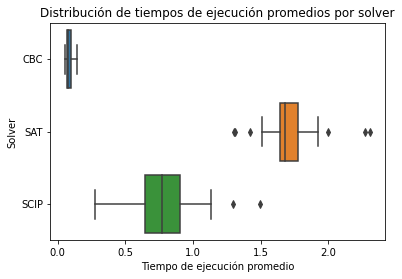

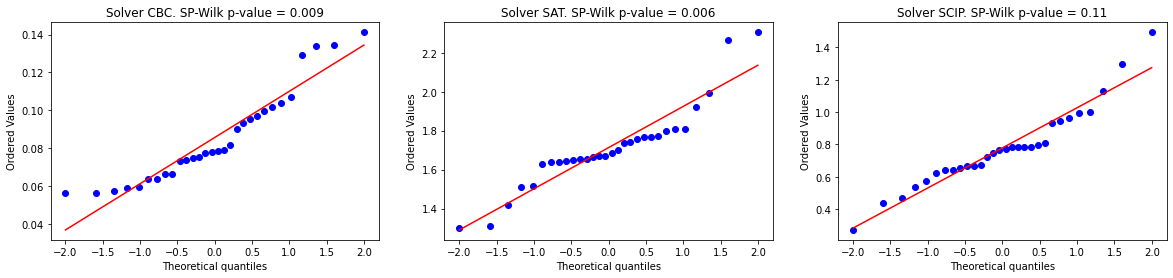

Sphericity: False
Friedman    9.357623e-14
Name: p-unc, dtype: float64


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,solver,CBC,SAT,True,False,-40.380545,29.0,less,2.422771e-27,9.002e+23,-10.420255
1,solver,CBC,SCIP,True,False,-15.356539,29.0,less,9.148541e-16,6.571e+12,-3.891283
2,solver,SAT,SCIP,True,False,13.928752,29.0,less,1.000000e+00,1.668e-12,3.963652


In [33]:
distribuciones(class_size=30,score_type="belbin",group_size="3")
rm_anova, friedman = tests(class_size=30,score_type="belbin",group_size="3")
print(friedman["p-unc"])
post_hoc(class_size=30,score_type="belbin",group_size="3",alternative="less")

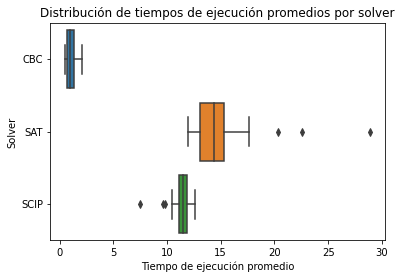

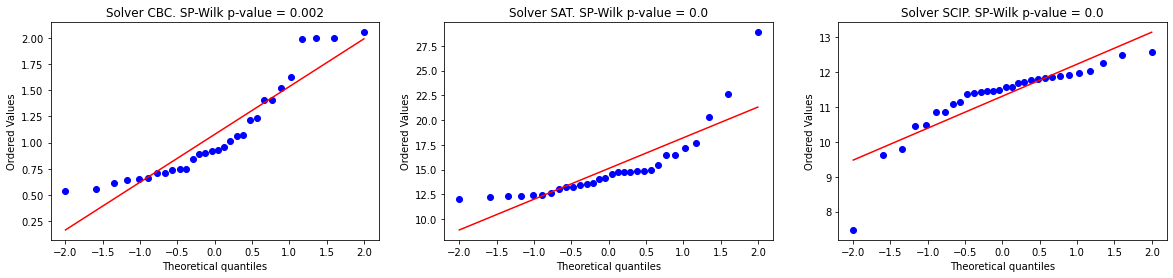

Sphericity: False
Friedman    9.357623e-14
Name: p-unc, dtype: float64


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,solver,CBC,SAT,True,False,-21.501704,29.0,less,1.143533e-19,3.658e+16,-5.484862
1,solver,CBC,SCIP,True,False,-44.512689,29.0,less,1.500229e-28,1.317e+25,-12.961902
2,solver,SAT,SCIP,True,False,5.102895,29.0,less,9.999905e-01,0.0,1.441685


In [34]:
distribuciones(class_size=60,score_type="belbin",group_size="3")
rm_anova, friedman = tests(class_size=60,score_type="belbin",group_size="3")
print(friedman["p-unc"])
post_hoc(class_size=60,score_type="belbin",group_size="3",alternative="less")

2.2.3. Grupos de 5

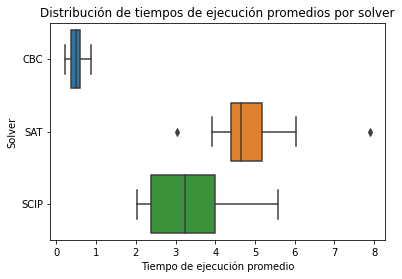

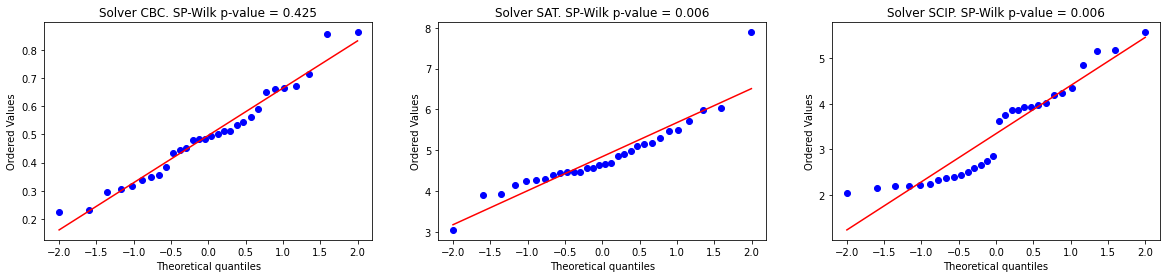

Sphericity: False
Friedman    2.997228e-12
Name: p-unc, dtype: float64


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,solver,CBC,SAT,True,False,-26.688246,29.0,two-sided,5.824681e-22,5.728e+18,-6.918534
1,solver,CBC,SCIP,True,False,-14.468660,29.0,two-sided,8.484150e-15,7.567e+11,-3.687179
2,solver,SAT,SCIP,True,False,5.700767,29.0,two-sided,3.630381e-06,5359.251,1.522635


In [35]:
distribuciones(class_size=20,score_type="belbin",group_size="5")
rm_anova, friedman = tests(class_size=20,score_type="belbin",group_size="5")
print(friedman["p-unc"])
post_hoc(class_size=20,score_type="belbin",group_size="5",alternative="two-sided") #scip es menor que sat, y cbc menor que todos

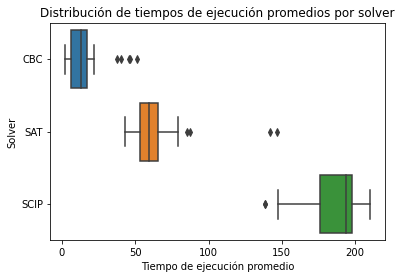

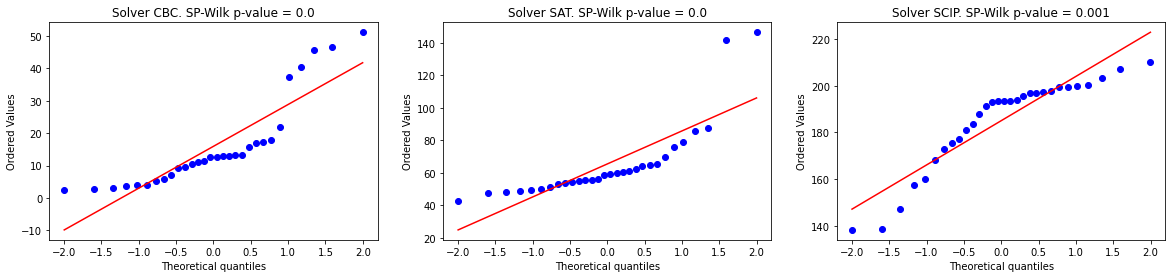

SpherResults(spher=True, W=0.9553094483192698, chi2=1.2801589173517658, dof=2, pval=0.5272505277497651)
Friedman    9.357623e-14
Name: p-unc, dtype: float64


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,solver,CBC,SAT,True,False,-11.038394,29.0,two-sided,6.700498e-12,1.302e+09,-2.497201
1,solver,CBC,SCIP,True,False,-37.623896,29.0,two-sided,3.628529e-26,6.459e+22,-9.797457
2,solver,SAT,SCIP,True,False,-22.847951,29.0,two-sided,4.322209e-20,9.079e+16,-5.384157


In [36]:
distribuciones(class_size=30,score_type="belbin",group_size="5")
rm_anova, friedman = tests(class_size=30,score_type="belbin",group_size="5")
print(friedman["p-unc"])
post_hoc(class_size=30,score_type="belbin",group_size="5",alternative="two-sided") 

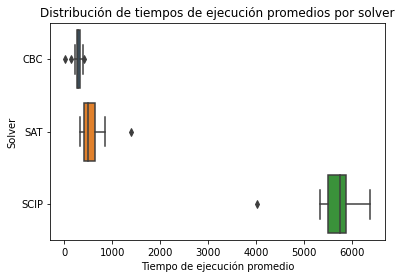

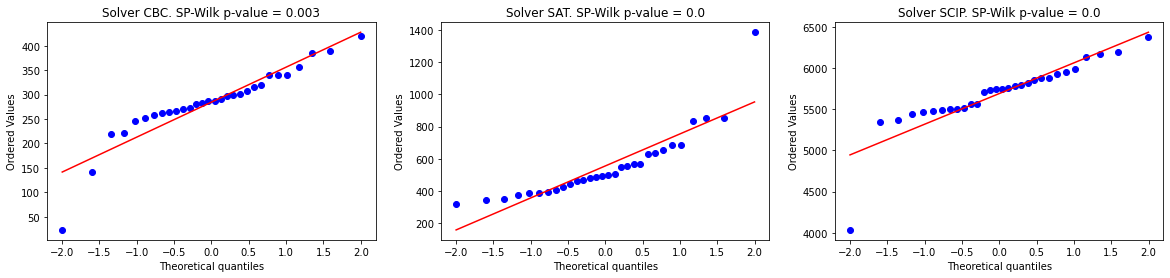

Sphericity: False
Friedman    2.460274e-13
Name: p-unc, dtype: float64


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,solver,CBC,SAT,True,False,-6.463676,29.0,two-sided,4.501486e-07,3.699e+04,-1.655255
1,solver,CBC,SCIP,True,False,-70.610964,29.0,two-sided,5.237614e-34,2.367e+30,-18.234717
2,solver,SAT,SCIP,True,False,-50.411267,29.0,two-sided,8.498026e-30,2.049e+26,-15.557178


In [37]:
distribuciones(class_size=40,score_type="belbin",group_size="5")
rm_anova, friedman = tests(class_size=40,score_type="belbin",group_size="5")
print(friedman["p-unc"])
post_hoc(class_size=40,score_type="belbin",group_size="5",alternative="two-sided") 

### 3. MBTI scores

3.1. Grupos 3-5

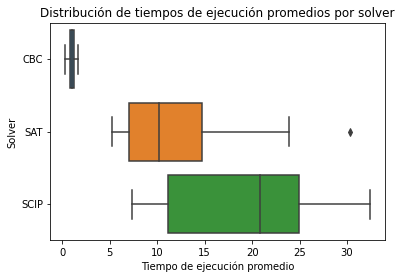

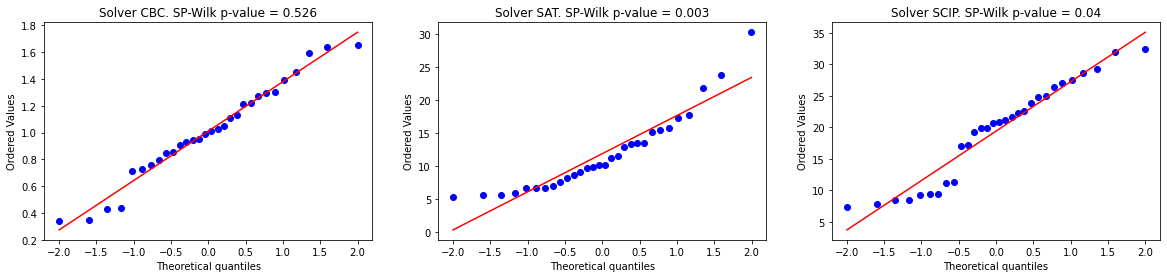

Sphericity: False
Friedman    6.035676e-12
Name: p-unc, dtype: float64


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,solver,CBC,SAT,True,False,-9.872793,29.0,less,4.408559e-11,2.256e+08,-2.550636
1,solver,CBC,SCIP,True,False,-13.031845,29.0,less,5.951893e-14,1.213e+11,-3.295469
2,solver,SAT,SCIP,True,False,-4.223485,29.0,less,1.086983e-04,257.945,-1.074262


In [38]:
distribuciones(class_size=20,score_type="mbti",group_size="3-5")
rm_anova, friedman = tests(class_size=20,score_type="mbti",group_size="3-5")
print(friedman["p-unc"])
post_hoc(class_size=20,score_type="mbti",group_size="3-5",alternative="less")

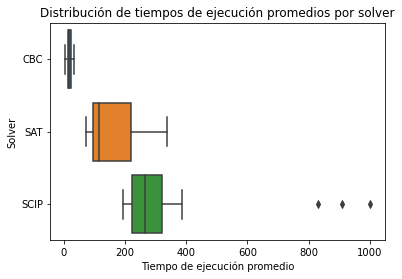

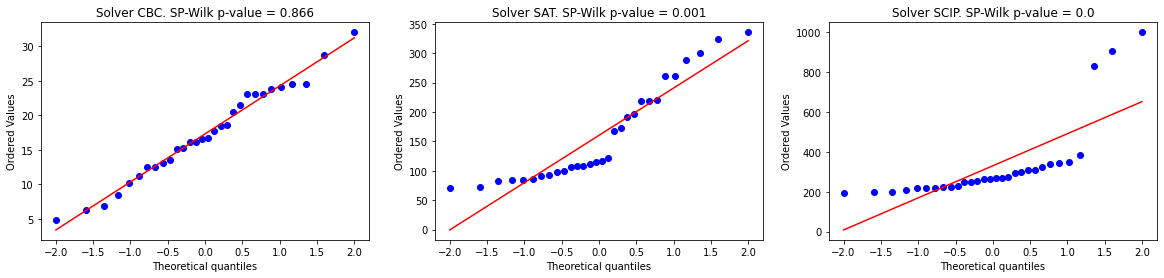

Sphericity: False
Friedman    1.137049e-11
Name: p-unc, dtype: float64


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,solver,CBC,SAT,True,False,-9.587050,29.0,less,8.515017e-11,1.209e+08,-2.403623
1,solver,CBC,SCIP,True,False,-8.351280,29.0,less,1.660312e-09,7.32e+06,-2.130776
2,solver,SAT,SCIP,True,False,-3.833399,29.0,less,3.138515e-04,100.084,-1.072645


In [39]:
distribuciones(class_size=30,score_type="mbti",group_size="3-5")
rm_anova, friedman = tests(class_size=30,score_type="mbti",group_size="3-5")
print(friedman["p-unc"])
post_hoc(class_size=30,score_type="mbti",group_size="3-5",alternative="less")

3.2. Grupos de 4

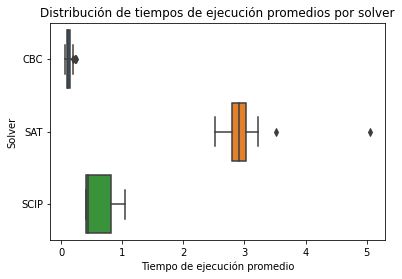

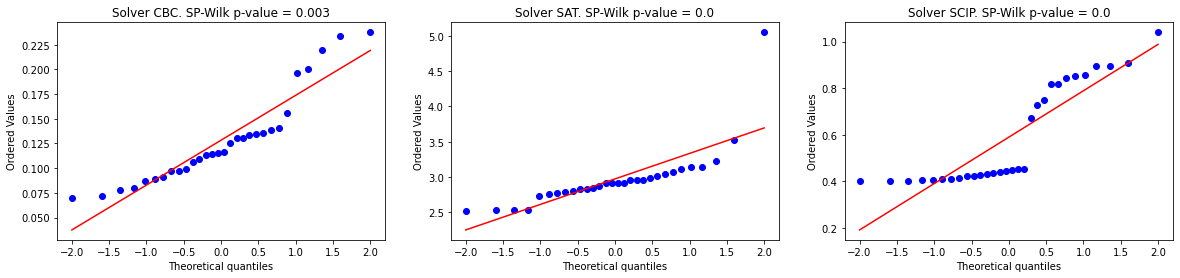

Sphericity: False
Friedman    9.357623e-14
Name: p-unc, dtype: float64


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,solver,CBC,SAT,True,False,-34.745746,29.0,less,1.737521e-25,1.463e+22,-8.792833
1,solver,CBC,SCIP,True,False,-11.173897,29.0,less,2.510350e-12,3.428e+09,-2.917261
2,solver,SAT,SCIP,True,False,23.579375,29.0,less,1.000000e+00,2.388e-18,6.674305


In [40]:
distribuciones(class_size=20,score_type="mbti",group_size="4")
rm_anova, friedman = tests(class_size=20,score_type="mbti",group_size="4")
print(friedman["p-unc"])
post_hoc(class_size=20,score_type="mbti",group_size="4",alternative="less")

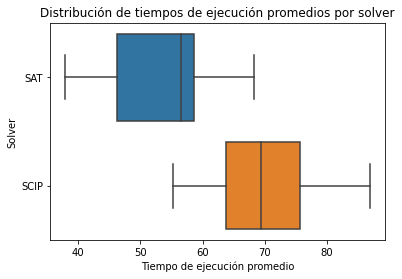

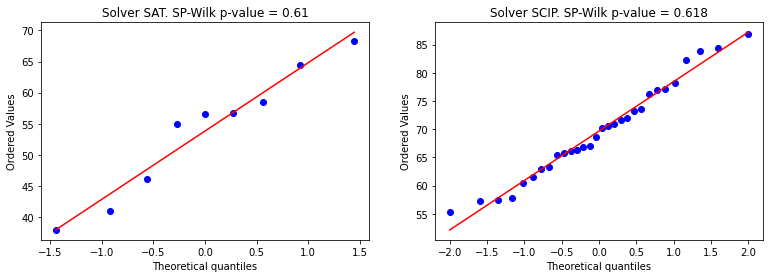

(True, nan, nan, 1, 1.0)
0    0.000151
1         NaN
Name: p-unc, dtype: float64


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,solver,SAT,SCIP,True,True,-6.710655,8.0,less,0.000076,397.527,-1.632394


In [41]:
#de los pocos paramétricos (no está completo)
distribuciones(class_size=40,score_type="mbti",group_size="4")
rm_anova, friedman = tests(class_size=40,score_type="mbti",group_size="4")
print(rm_anova["p-unc"])
post_hoc(class_size=40,score_type="mbti",group_size="4",alternative="less",param="True")

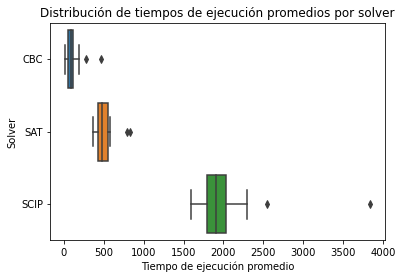

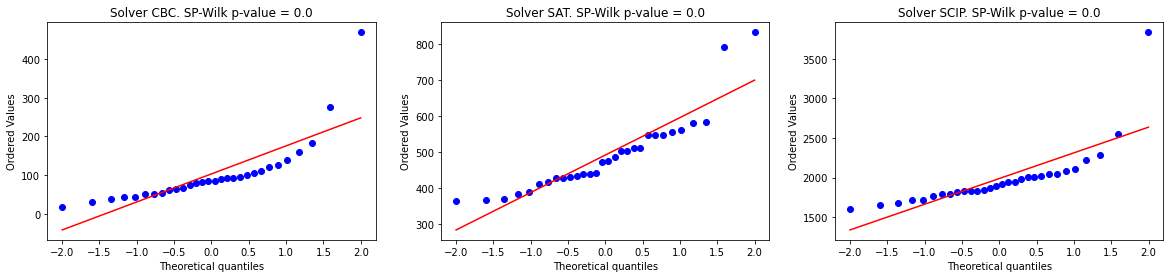

Sphericity: False
Friedman    2.460274e-13
Name: p-unc, dtype: float64


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,solver,CBC,SAT,True,False,-14.908459,29.0,less,1.966604e-15,3.158e+12,-3.888780
1,solver,CBC,SCIP,True,False,-24.560156,29.0,less,2.936714e-21,1.239e+18,-6.385546
2,solver,SAT,SCIP,True,False,-19.301209,29.0,less,2.147421e-18,2.185e+15,-5.002983


In [42]:
distribuciones(class_size=60,score_type="mbti",group_size="4")
rm_anova, friedman = tests(class_size=60,score_type="mbti",group_size="4")
print(friedman["p-unc"])
post_hoc(class_size=60,score_type="mbti",group_size="4",alternative="less")

Grupos de 3

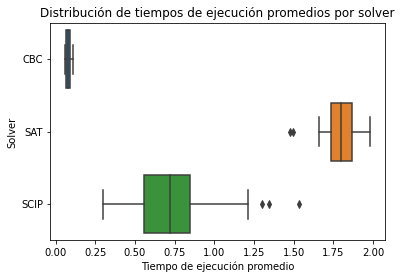

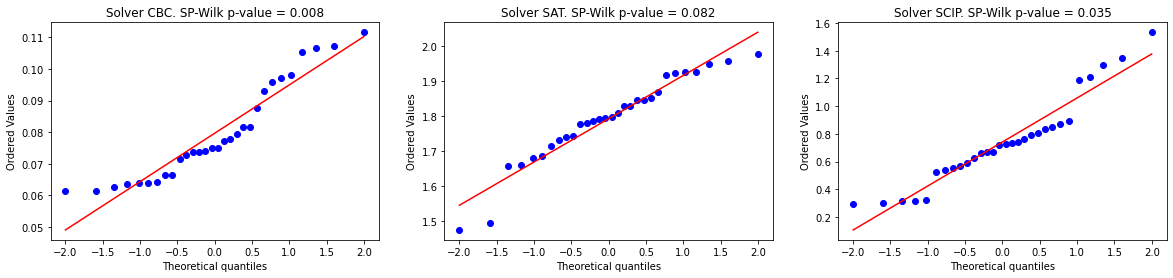

Sphericity: False
Friedman    9.357623e-14
Name: p-unc, dtype: float64


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,solver,CBC,SAT,True,False,-73.189277,29.0,less,9.308054e-35,1.285e+31,-19.310674
1,solver,CBC,SCIP,True,False,-11.340123,29.0,less,1.767210e-12,4.787e+09,-2.909178
2,solver,SAT,SCIP,True,False,17.737272,29.0,less,1.000000e+00,4.026e-15,4.314899


In [43]:
distribuciones(class_size=30,score_type="mbti",group_size="3")
rm_anova, friedman = tests(class_size=30,score_type="mbti",group_size="3")
print(friedman["p-unc"])
post_hoc(class_size=30,score_type="mbti",group_size="3",alternative="less")

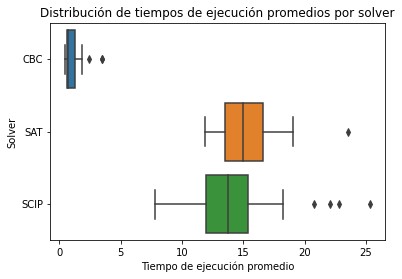

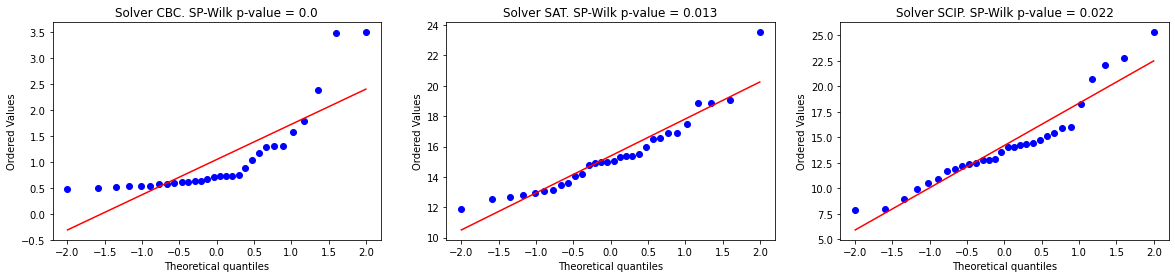

Sphericity: False
Friedman    7.352958e-11
Name: p-unc, dtype: float64


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,solver,CBC,SAT,True,False,-30.352869,29.0,two-sided,1.581614e-23,1.847e+20,-7.694565
1,solver,CBC,SCIP,True,False,-17.291363,29.0,two-sided,8.138026e-17,6.489e+13,-4.321457
2,solver,SAT,SCIP,True,False,1.291065,29.0,two-sided,2.068786e-01,0.413,0.339475


In [44]:
distribuciones(class_size=60,score_type="mbti",group_size="3")
rm_anova, friedman = tests(class_size=60,score_type="mbti",group_size="3")
print(friedman["p-unc"])
post_hoc(class_size=60,score_type="mbti",group_size="3",alternative="two-sided") #sat y scip no presentan diferencias

Grupos de 5

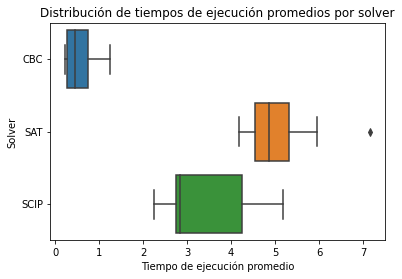

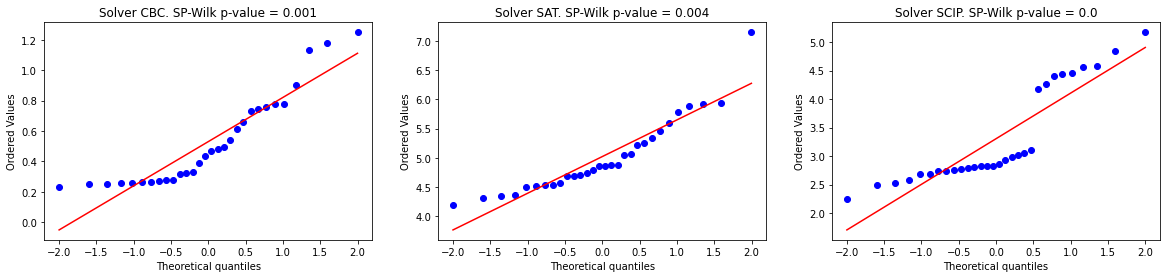

Sphericity: False
Friedman    6.051298e-13
Name: p-unc, dtype: float64


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,solver,CBC,SAT,True,False,-37.606176,29.0,less,1.838732e-26,1.275e+23,-8.770287
1,solver,CBC,SCIP,True,False,-16.293975,29.0,less,1.950434e-16,2.888e+13,-4.264946
2,solver,SAT,SCIP,True,False,8.828944,29.0,less,1.000000e+00,4.526e-08,2.228105


In [45]:
distribuciones(class_size=20,score_type="mbti",group_size="5")
rm_anova, friedman = tests(class_size=20,score_type="mbti",group_size="5")
print(friedman["p-unc"])
post_hoc(class_size=20,score_type="mbti",group_size="5",alternative="less")

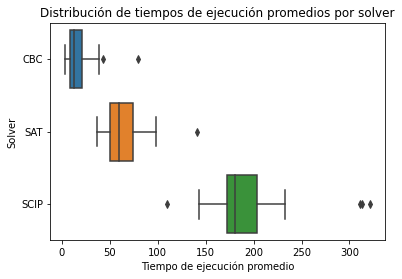

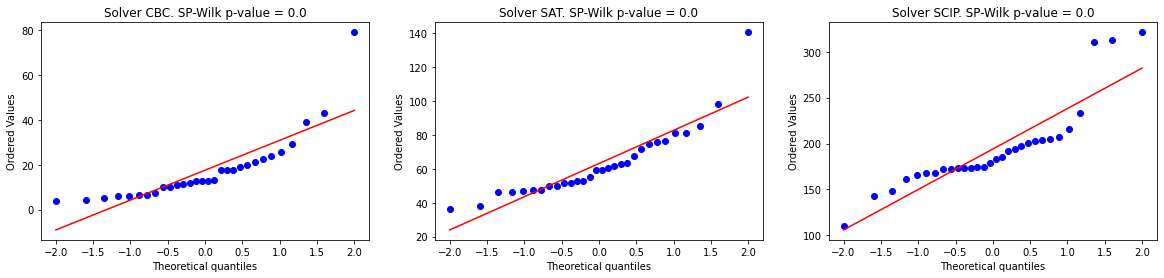

Sphericity: False
Friedman    2.460274e-13
Name: p-unc, dtype: float64


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,solver,CBC,SAT,True,False,-8.860325,29.0,less,4.766821e-10,2.374e+07,-2.473060
1,solver,CBC,SCIP,True,False,-21.048708,29.0,less,2.045469e-19,2.092e+16,-4.955611
2,solver,SAT,SCIP,True,False,-14.163840,29.0,less,7.304109e-15,9.0e+11,-3.533078


In [46]:
distribuciones(class_size=30,score_type="mbti",group_size="5")
rm_anova, friedman = tests(class_size=30,score_type="mbti",group_size="5")
print(friedman["p-unc"])
post_hoc(class_size=30,score_type="mbti",group_size="5",alternative="less")

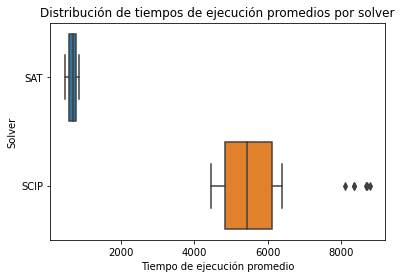

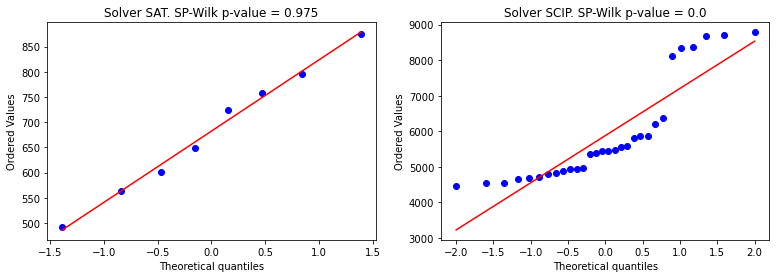

(True, nan, nan, 1, 1.0)
Friedman    0.004678
Name: p-unc, dtype: float64


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,solver,SAT,SCIP,True,False,-13.039085,7.0,less,0.000002,8845.975,-5.843501


In [47]:
#cambiar a paramétrico
distribuciones(class_size=40,score_type="mbti",group_size="5")
rm_anova, friedman = tests(class_size=40,score_type="mbti",group_size="5")
print(friedman["p-unc"])
post_hoc(class_size=40,score_type="mbti",group_size="5",alternative="less")